In [9]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

from js import fetch
import io

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

In [73]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(boston_url)
Boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())
boston_df=pd.read_csv(Boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


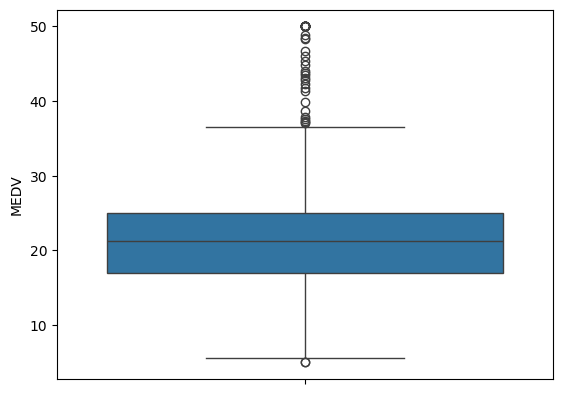

In [74]:
sns.boxplot(y = 'MEDV',data = boston_df)
plt.show()

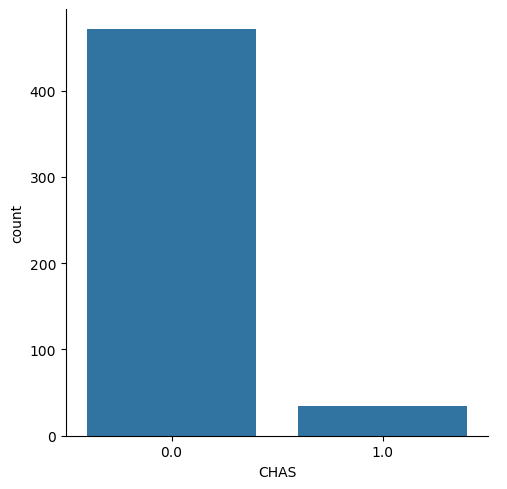

In [75]:
sns.catplot(x = 'CHAS' , kind = 'count',data = boston_df)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


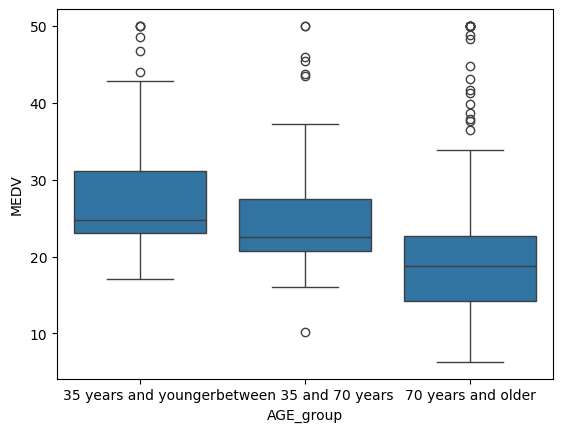

In [76]:
#boston_df['AGE'] = pd.to_numeric(boston_df['AGE'], errors='coerce')
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'], right=False)
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
boston_df
#boston_df[boston_df['AGE'] < 35]

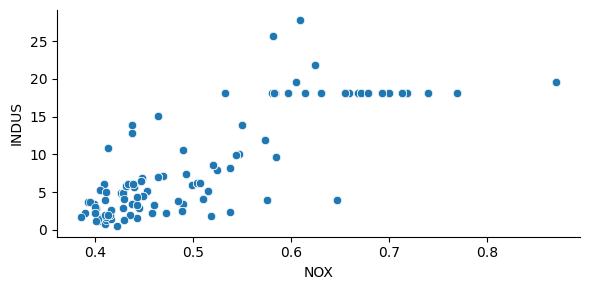

In [77]:
sns.relplot(x="NOX", y="INDUS",
            data=boston_df, height = 3, aspect = 2)

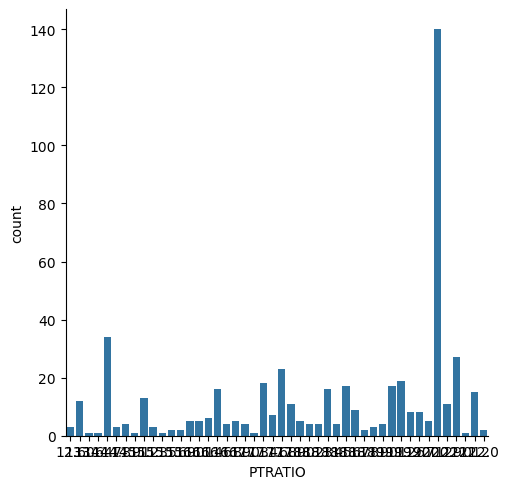

In [78]:
sns.catplot( x = 'PTRATIO', kind = 'count', data = boston_df)

In [79]:
# null hypothesis is whether house bounded by Charles river or not have same median value
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')
# p-value is less than 0.05, so we assume the variance are not equal

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [80]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)
# p-value is less than 0.05, so we reject the null hyphthesis that there is signifcant difference in median value of house bounded by the Charles river

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [81]:
# Assuming df is your DataFrame
# Group the DataFrame by 'group_column' and extract 'value_column'
grouped_data = boston_df.groupby('AGE_group')['MEDV'].apply(list)

# Perform Levene's Test
stat, p_value = scipy.stats.levene(*grouped_data)

# Print the test result
print('Levene Statistic:', stat)
print('P-Value:', p_value)

Levene Statistic: 2.6446135626322533
P-Value: 0.07211272136243944


In [118]:
# null hypothesis : three groups have no difference
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = '35 to 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 and older'

In [119]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == '35 to 70']['MEDV'],
                   boston_df[boston_df['age_group'] == '70 and older']['MEDV'],
                   center = 'mean')
# p-value greater than 0.06, thus varience are equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [110]:
#scipy.stats.levene(boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV'],
#                   boston_df[boston_df['AGE_group'] == 'between 35 and 70 years']['MEDV'], 
#                   boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV'], 
#                   center='mean')

In [120]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == '35 to 70']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 and older']['MEDV']

In [121]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
# p-value greater than 0.05, we can not reject the null hypothesis, three groups have same median value 

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [122]:
# null hypothesis: there is no relation between Nitric oxide concentrations and proportion of non-retail business acres per town
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
# p-value is greater than 0.05, thus we can not reject the null hypothesis, so there is no relation  between Nitric oxide concentrations and proportion of non-retail business acres per town

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [126]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()
# p-value is close to 0 which means DIS is significant to MEDV

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        17:54:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""